In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#import data
city_data = pd.read_csv('city_data.csv')
ride_data = pd.read_csv('ride_data.csv')
joined_df = pd.merge(city_data, ride_data, how = "outer", on = 'city')
joined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


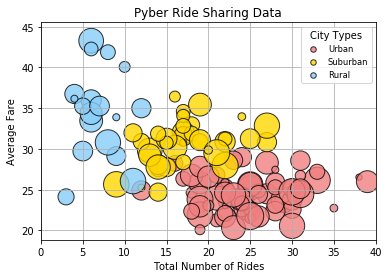

In [3]:
#Bubble Plot
urbanCities=joined_df[joined_df["type"]=="Urban"]
suburbanCities=joined_df[joined_df["type"]=="Suburban"]
ruralCities=joined_df[joined_df["type"]=="Rural"]

urbanRideCount=urbanCities.groupby(["city"]).count()["ride_id"]
urbanFareAvg=urbanCities.groupby(["city"]).mean()["fare"]
urbanDriverCount=urbanCities.groupby(["city"]).mean()["driver_count"]

suburbanRideCount=suburbanCities.groupby(["city"]).count()["ride_id"]
suburbanFareAvg=suburbanCities.groupby(["city"]).mean()["fare"]
suburbanDriverCount=suburbanCities.groupby(["city"]).mean()["driver_count"]

ruralRideCount=ruralCities.groupby(["city"]).count()["ride_id"]
ruralFareAvg=ruralCities.groupby(["city"]).mean()["fare"]
ruralDriverCount=ruralCities.groupby(["city"]).mean()["driver_count"]

col_list = ["lightskyblue", "gold", "lightcoral"]

plt.scatter(urbanRideCount, 
            urbanFareAvg, 
            s=10*urbanDriverCount,
            edgecolor="black", linewidths=1, color=col_list[2], marker="o",
            alpha=0.8, label="Urban")

plt.scatter(suburbanRideCount, 
            suburbanFareAvg, 
            s=10*urbanDriverCount,
            edgecolor="black", linewidths=1, color=col_list[1], marker="o",
            alpha=0.8, label="Suburban")

plt.scatter(ruralRideCount, 
            ruralFareAvg, 
            s=10*urbanDriverCount,
            edgecolor="black", linewidths=1, color=col_list[0], marker="o",
            alpha=0.8, label="Rural")

plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average Fare")
plt.xlabel("Total Number of Rides")
plt.xlim((0,40))
plt.grid(True)


lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.show()


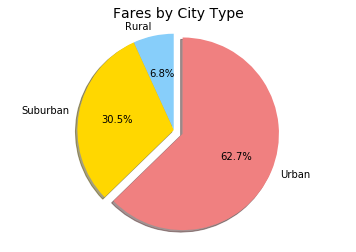

In [6]:
#Total Fares by City Type Pie Chart
typeFare = joined_df.groupby('type')["fare"].sum().reset_index()
fig1, ax1 = plt.subplots()
ax1.pie(typeFare["fare"], labels = typeFare["type"], shadow = True, explode = (0,0,0.1), 
        startangle=90, colors= col_list, autopct = "%1.1f%%",)
ax1.axis('equal')
plt.title('Fares by City Type', fontsize = 14).axes.get_yaxis().set_visible(False)
plt.show()

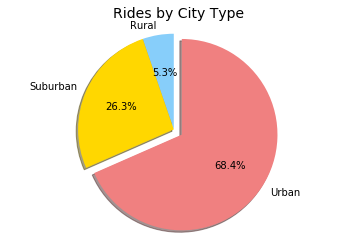

In [8]:
#Total Rides by City Type Pie Chart
typeRide = joined_df.groupby('type')["ride_id"].count().reset_index()
fig1, ax1 = plt.subplots()
ax1.pie(typeRide["ride_id"], labels = typeRide["type"], shadow = True, explode = (0,0,0.1), 
        startangle=90, colors= col_list, autopct = "%1.1f%%")
ax1.axis('equal')
plt.title('Rides by City Type', fontsize = 14).axes.get_yaxis().set_visible(False)
plt.show()

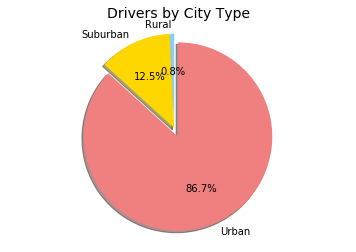

In [7]:
#Total Drivers by City Type Pie Chart
typeDriver = joined_df.groupby('type')["driver_count"].sum().reset_index()
fig1, ax1 = plt.subplots()
ax1.pie(typeDriver["driver_count"], labels = typeDriver["type"], shadow = True, explode = (0,0,0.1), 
        startangle=90, colors= col_list, autopct = "%1.1f%%")
ax1.axis('equal')
plt.title('Drivers by City Type', fontsize = 14).axes.get_yaxis().set_visible(False)
plt.show()

3 Observable Trends:
1. Average fare is higher in rural cities.
2. Highest number of riders are in urban cities.
3. Highest number of drivers are in urban cities.